# Using Python for learning statistics Part 1

This Juppyter notebook contains the code examples form the blog post [Python coding skills for statistics Part 1](https://docs.google.com/document/d/16WJnYeezBevUBvsYpbklW04ukvrtG_8QVdfsbd15pqg/edit).

I've intentionally left empty code cells throughout the notebook,
which you can use to try some Python commands on your own.
For example,
you can copy-paste some of the commands in previous cells,
modify them and run to see what happens.
Try to break things.

**To run a code cell, press** the play button in the menu bar, or use the keyboard shortcut **SHIFT+ENTER**.

### Notebook setup

In [1]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (6.25, 2.0)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

def savefig(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

<Figure size 640x480 with 0 Axes>

## What can python do for you?

### Using Python as a calculator

In [2]:
2.1 + 3.4

5.5

In [3]:
num1 = 2.1

In [4]:
num2 = 3.4

In [5]:
num1 + num2

5.5

Let's now compute the avarage of the numbers `num1` and `num2`.

In [6]:
(num1 + num2) / 2

2.75

### Powerful primitives and builtin functions

In [7]:
grades = [80, 90, 70, 60]
avg = sum(grades) / len(grades)
avg

75.0

### For loops

In [8]:
total = 0
for grade in grades:
    total = total + grade
avg = total / len(grades)
avg

75.0

### Functions

Python functions are ...

To **define** the Python function,
we use the `def` keyword followed by the function name,
then we then specify the function input in parentheses,
and end with the symbol `:`,
which tells us "body" of the function is about to start.
The function body is a four-spaces-indented code block that specifies all the
calculations the function performs,
and ends with a `return` statement for the output of the function.

```
def <fname>(<input>):
    <fcalc 1>
    <fcalc 2>
    <fcalc ...>
    return <output>
```

#### Example 1: sample mean

We want to define a Python function `mean` that computes the mean from a given sample (a list of values).

The mathematical definition of the mean is $\mathbf{Mean}(\mathbf{x}) = \frac{1}{n}  \sum_{i=1}^{i=n} x_i$,
where $\mathbf{x} = [x_1, x_2, x_3, \ldots, x_n]$ is a sample of size $n$ (a list of values).

The code for the function is as follows:

In [9]:
def mean(sample):
    total = sum(sample)
    avg = total / len(sample)
    return avg

To **call** the function `mean` with input `grades`, we use the Python code `mean(grades)`.

In [10]:
grades = [80, 90, 70, 60]
mean(grades)

75.0

#### Exmample 2: math function (bonus topic)

In math, 
a function is a mapping from input values (usually denoted x) to output values (usually denoted y).
Consider the mapping that doubles the input and adds five to it,
which we can express as the math function $f(x) = 2x+5$.
For any input $x$,
the output of the function $f$ is denoted $f(x)$ and is equal to $2x+5$.
For example, $f(3)$ describes the output of the function when the input is $x=3$,
and it is equal to $2(3)+5 = 6 + 5 = 11$.
The Python equivalent of the math function $f(x) = 2x+5$ is shown below. 

In [11]:
def f(x):
    y = 2*x + 5
    return y

To **call** the function `f` with input `x`, we simply writhe `f(x)` in Python,
which is the same as the math notation we use for "evaluate the function at the value x."

In [12]:
f(3)

11

In [13]:
## Exercise: plot the graph of the function f(x)

## Why do you need coding for statistics?

### Data visualization

In [14]:
prices = [11.8, 10, 11, 8.6, 8.3, 9.4, 8, 6.8, 8.5]

<Axes: >

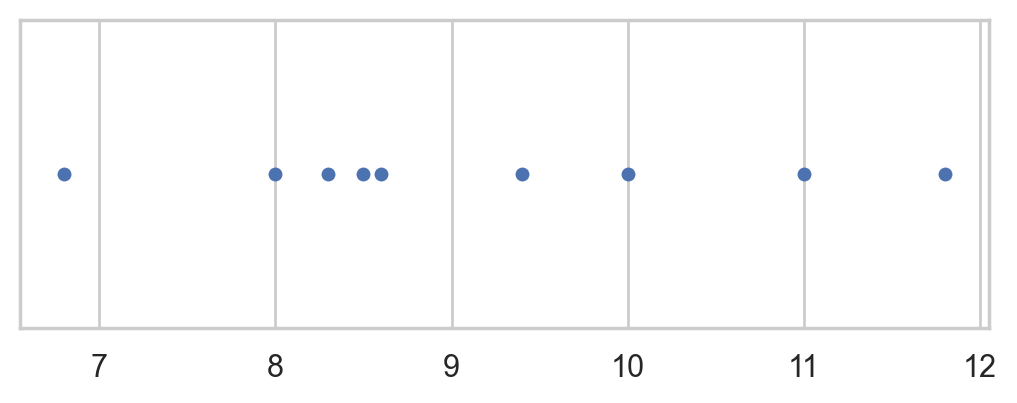

In [15]:
import seaborn as sns
sns.stripplot(x=prices, jitter=0)

<Axes: ylabel='Count'>

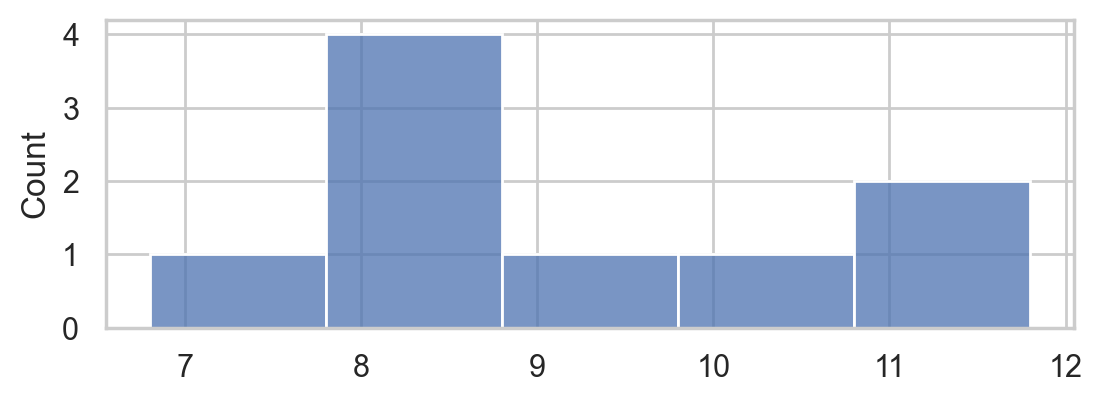

In [16]:
sns.histplot(x=prices)

<Axes: >

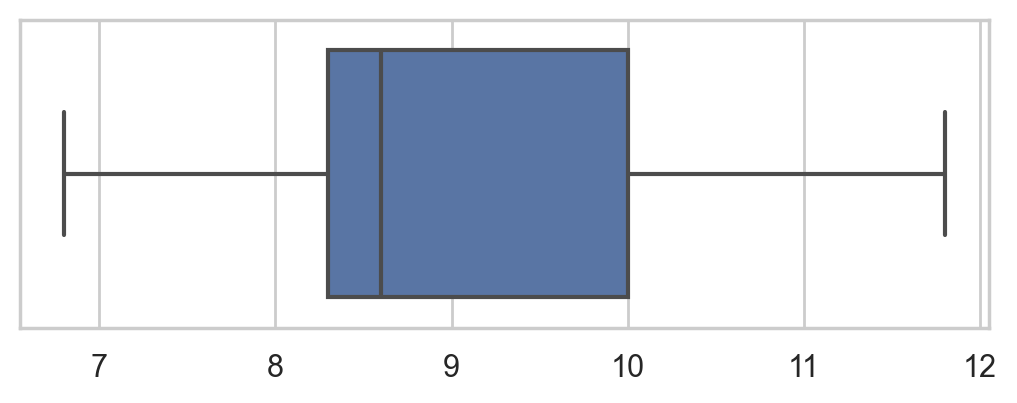

In [17]:
sns.boxplot(x=prices)

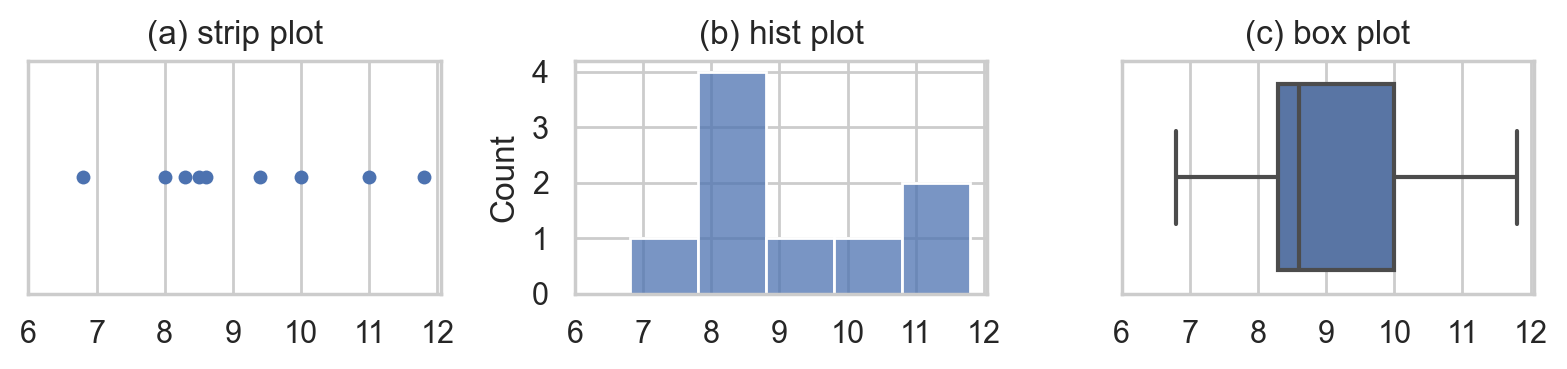

In [18]:
# FIGURES ONLY
import matplotlib.pyplot as plt
import seaborn as sns
with plt.rc_context({"figure.figsize":(8,2)}):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3)

    ax1.set_title("(a) strip plot")
    sns.stripplot(x=prices, ax=ax1, jitter=0)
    ax1.set_xticks(range(6,13))

    ax2.set_title("(b) hist plot")
    sns.histplot(x=prices, ax=ax2)
    ax2.set_xticks(range(6,13))
    ax2.set_yticks(range(0,5))

    ax3.set_title("(c) box plot")
    sns.boxplot(x=prices, ax=ax3)
    ax3.set_xticks(range(6,13))

savefig(fig, "figures/epricesW_strip_hist_box_plots.png")

### Descriptive statistics

In [19]:
len(prices)

9

In [20]:
mean(prices)

9.155555555555555

#### Data manipulations using Pandas

In [21]:
DATA_URL = "https://nobsstats.com/datasets/epriceswide.csv"

import pandas as pd
epriceswide = pd.read_csv(DATA_URL)
print(epriceswide)

   East  West
0   7.7  11.8
1   5.9  10.0
2   7.0  11.0
3   4.8   8.6
4   6.3   8.3
5   6.3   9.4
6   5.5   8.0
7   5.4   6.8
8   6.5   8.5


In [22]:
pricesW = epriceswide["West"]

In [23]:
type(pricesW)

pandas.core.series.Series

In [24]:
# # ALT. we can input data by specifying lists of values
# pricesW = pd.Series([11.8,10,11,8.6,8.3,9.4,8,6.8,8.5])

#### Descriptive statistics using pandas

In [25]:
pricesW.count()

9

In [26]:
pricesW.mean()

9.155555555555557

In [27]:
pricesW.std()

1.5621388471508475

In [28]:
pricesW.describe()

count     9.000000
mean      9.155556
std       1.562139
min       6.800000
25%       8.300000
50%       8.600000
75%      10.000000
max      11.800000
Name: West, dtype: float64

### Data cleaning

In [29]:
import pandas as pd

DATA_URL = "https://nobsstats.com/datasets/epriceswide.csv"
epriceswide = pd.read_csv(DATA_URL)
print(epriceswide)

   East  West
0   7.7  11.8
1   5.9  10.0
2   7.0  11.0
3   4.8   8.6
4   6.3   8.3
5   6.3   9.4
6   5.5   8.0
7   5.4   6.8
8   6.5   8.5


Click [here](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0Aimport%20io%0A%0Aepriceswide_csv%20%3D%20'''%0AEast,West%0A7.7,11.8%0A5.9,10.0%0A7.0,11.0%0A4.8,8.6%0A6.3,8.3%0A6.3,9.4%0A5.5,8.0%0A5.4,6.8%0A6.5,8.5%0A'''%0A%0Aepriceswide%20%3D%20pd.read_csv%28io.StringIO%28epriceswide_csv%29%29%0A%0Aepriceswide.melt%28var_name%3D%22end%22,%20value_name%3D%22price%22%29&d=2023-07-02&lang=py&v=v1) to see a visualization of the above melt operation.

In [30]:
eprices = pd.melt(epriceswide, var_name="end", value_name='price')
print(eprices)

     end  price
0   East    7.7
1   East    5.9
2   East    7.0
3   East    4.8
4   East    6.3
5   East    6.3
6   East    5.5
7   East    5.4
8   East    6.5
9   West   11.8
10  West   10.0
11  West   11.0
12  West    8.6
13  West    8.3
14  West    9.4
15  West    8.0
16  West    6.8
17  West    8.5


In [31]:
pricesW = eprices[eprices["end"]=="West"]["price"]
pricesE = eprices[eprices["end"]=="East"]["price"]

pricesW.values, pricesE.values

(array([11.8, 10. , 11. ,  8.6,  8.3,  9.4,  8. ,  6.8,  8.5]),
 array([7.7, 5.9, 7. , 4.8, 6.3, 6.3, 5.5, 5.4, 6.5]))

## How much Python do you need to know?

I remind you the key aspect is to learn how to use Python as a calculator.

I talked about the `for`-loops and function definitions only to make sure you can **read Python code**,
but you don't need to write any such code to learn statistics.
As long as you know how to call functions and run code cells in a notebook,
then you'll still benefit from all the educational power that Python has to offer.



## Conclusion

## Links

- Book website [noBSstats.com](https://nobsstats.com/intro.html): contains all the notebooks, demos, and visualizations from the book.
- [Detailed book outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit): continuously updated list of the topics that are covered in each section.
- [Python tutorial](https://nobsstats.com/tutorials/python_tutorial.html)
- [Pandas tutorial](https://nobsstats.com/tutorials/pandas_tutorial.html)
- [Seaborn tutorial](https://nobsstats.com/tutorials/seaborn_tutorial.html)
- Previous blog posts:
  - [Outline of the stats curriculum research](https://minireference.com/blog/fixing-the-introductory-statistics-curriculum/)
  - [Book proposal](https://minireference.com/blog/no-bullshit-guide-to-statistics-progress-update/)
  - [Stats survey results](https://minireference.com/blog/what-stats-do-people-want-to-learn/)
  - Part 2
  - Part 3

_____